In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn import svm

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [34]:
train = pd.read_csv("voting_train.csv")
test = pd.read_csv("voting_test.csv")

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      218 non-null    int64 
 1   class                                   218 non-null    object
 2   handicapped-infants                     218 non-null    object
 3   water-project-cost-sharing              218 non-null    object
 4   adoption-of-the-budget-resolution       218 non-null    object
 5   physician-fee-freeze                    218 non-null    object
 6   el-salvador-aid                         218 non-null    object
 7   religious-groups-in-schools             218 non-null    object
 8   anti-satellite-test-ban                 218 non-null    object
 9   aid-to-nicaraguan-contras               218 non-null    object
 10  mx-missile                              218 non-null    object
 11  immigr

In [36]:
train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,67,republican,n,y,n,y,y,y,y,n,n,n,y,y,y,y,n,y
1,338,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
2,35,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
3,122,republican,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
4,420,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      217 non-null    int64 
 1   handicapped-infants                     217 non-null    object
 2   water-project-cost-sharing              217 non-null    object
 3   adoption-of-the-budget-resolution       217 non-null    object
 4   physician-fee-freeze                    217 non-null    object
 5   el-salvador-aid                         217 non-null    object
 6   religious-groups-in-schools             217 non-null    object
 7   anti-satellite-test-ban                 217 non-null    object
 8   aid-to-nicaraguan-contras               217 non-null    object
 9   mx-missile                              217 non-null    object
 10  immigration                             217 non-null    object
 11  synfue

In [38]:
test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,430,y,n,y,n,unknown,n,y,y,y,y,n,y,n,unknown,y,y
1,411,n,n,n,y,y,y,n,n,n,n,y,y,y,y,n,y
2,167,y,n,y,y,y,y,y,y,n,y,n,y,n,y,y,y
3,99,y,y,y,n,n,y,y,y,y,y,n,n,n,n,n,y
4,415,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [39]:
X_train = train.drop(["ID", "class"], axis=1)
y_train = train["class"]

X_test = test.drop(["ID"], axis=1)

# Pre-processing

## Encoding

In [40]:
ohe = OneHotEncoder()
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.fit_transform(X_test)

# Exploratory data analysis

In [41]:
X_train.isnull().sum()

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-crporation-cutback               0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

# Feature Selection

Feature 0: 22.572159
Feature 1: 0.213391
Feature 2: 29.292517
Feature 3: 0.200557
Feature 4: 1.244920
Feature 5: 0.887962
Feature 6: 67.698022
Feature 7: 0.088086
Feature 8: 49.885813
Feature 9: 82.107549
Feature 10: 1.049617
Feature 11: 100.947269
Feature 12: 66.102861
Feature 13: 0.213391
Feature 14: 58.434258
Feature 15: 29.823134
Feature 16: 2.304012
Feature 17: 17.170968
Feature 18: 24.366743
Feature 19: 0.611795
Feature 20: 19.939123
Feature 21: 49.976756
Feature 22: 5.304442
Feature 23: 47.609013
Feature 24: 39.253464
Feature 25: 4.608025
Feature 26: 36.142908
Feature 27: 0.887962
Feature 28: 0.706781
Feature 29: 0.551945
Feature 30: 12.002552
Feature 31: 0.264258
Feature 32: 24.365897
Feature 33: 51.493377
Feature 34: 0.352344
Feature 35: 63.930472
Feature 36: 32.608490
Feature 37: 0.064854
Feature 38: 27.240355
Feature 39: 58.313254
Feature 40: 1.287269
Feature 41: 34.675489
Feature 42: 21.292091
Feature 43: 1.843665
Feature 44: 33.405960
Feature 45: 20.685537
Feature 46: 9.22

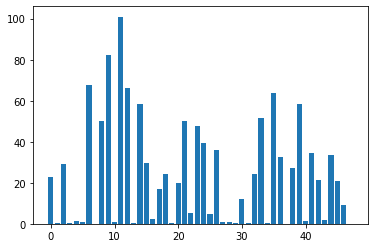

In [42]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

fs = SelectKBest(score_func=chi2, k=20)
fs.fit(X_train_enc, y_train)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Model selection

In [43]:
# Simple Grid Search to find best hyperparameters for different classifier

cv = 10         # number of folds
verbose = 1     # information shown during training

## KNN

In [44]:
parameters = {
"n_neighbors":[1, 5, 10, 20], 
"weights":["uniform", "distance"],
"metric":["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]}
knn = GridSearchCV(neighbors.KNeighborsClassifier(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
knn.fit(X_train_enc, y_train)

knn_results = pd.DataFrame(knn.cv_results_)
knn_results= knn_results[["param_n_neighbors", "param_weights", "param_metric", "mean_test_score"]]    
knn_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


,param_n_neighbors,param_weights,param_metric,mean_test_score
31,20,distance,minkowski,0.931358
7,20,distance,euclidean,0.931358
30,20,uniform,minkowski,0.931358
15,20,distance,manhattan,0.931358
14,20,uniform,manhattan,0.931358
6,20,uniform,euclidean,0.931358
28,10,uniform,minkowski,0.931149
12,10,uniform,manhattan,0.931149
4,10,uniform,euclidean,0.931149
13,10,distance,manhattan,0.931007


# Final model

In [45]:
model = knn.best_estimator_
model.fit(X_train_enc, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [46]:
predictions = pd.DataFrame(test["ID"])
predictions["class"] = model.predict(X_test_enc)

In [259]:
predictions.to_csv("submission.csv", index=False)